1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
2.0 1.9999999985189092 1.9999999987769774 1.9999999965130253 1.9999999964765098 1.9999999931252268 1.9999999926535876 1.9999999878429404 1.9999999867878542 1.9999999800595911 1.999999978271604 1.9999999690520147 1.9999999663886197 1.9999999539394662 1.9999999502751482 1.999999933611151 1.999999928854681 1.999999906604929 1.9999999007410998 1.9999998709113231 1.9999998641160088 1.9999998236559604 1.9999998166246762 1.9999997605449087 1.9999997554771205 1.9999996746723332 1.999999678595885 1.9999995526868324 1.9999995922200111 1.9999993509725418
3.0 2.999999993097214 2.9999999964653803 2.9999999866577687 2.999999990169746 2.9999999764895455 2.9999999801380626 2.999999961371995 2.999999965238852 2.999999939849647 2.999999944161161 2.99999991015845 2.9999999153603896 2.9999998700898223 2.99999987695898 2.9999998167578967 2.999999826591401 2.9999997462194323 2.999999761199

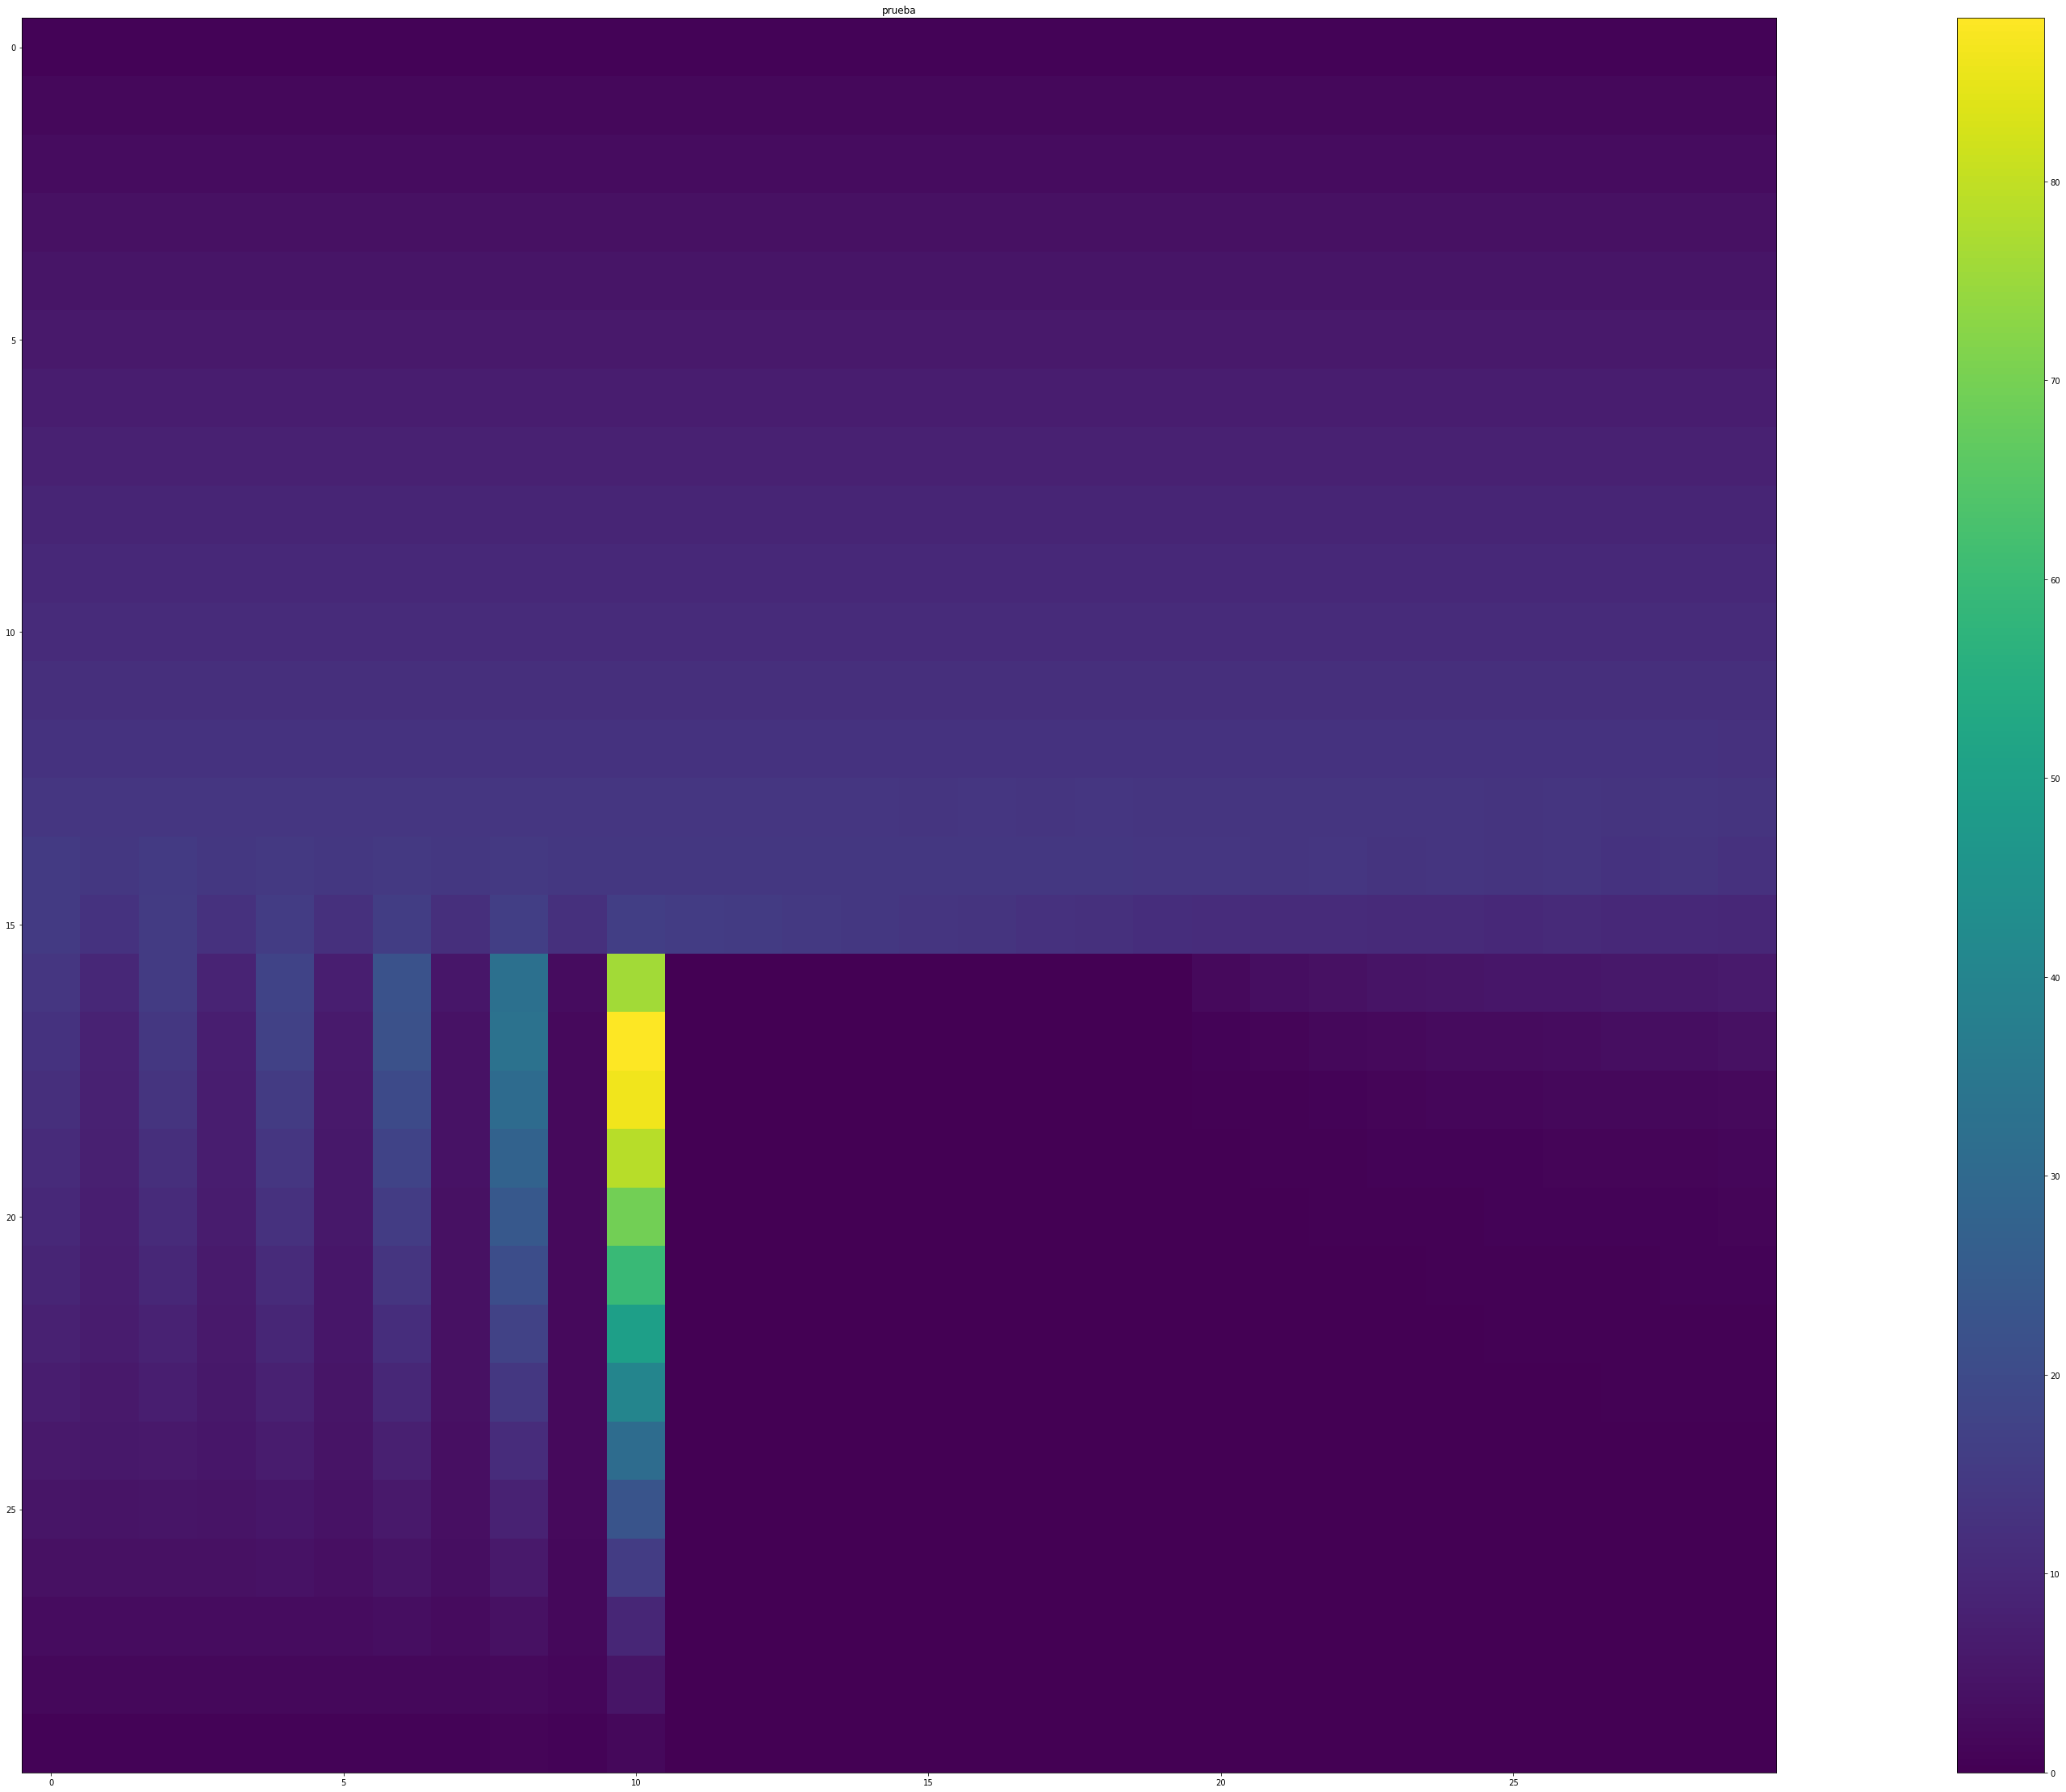

In [1]:
from logging import RootLogger
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as p 
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pylab as p 
from matplotlib import pyplot, cm
from numpy import *

import time 

#Parámetros iniciales
YMAX = 30
XMAX = 30
PPX = 1
PNX = 1
H = 1.8 #representaría nuestro dt, los 12 steps toman en cuenta el tiempo. Acá se toma en cuenta es un H, cambios de paso. El número de courant se trabajaría con H.
OMEGA = 0.1
N_ITERATIONS = 1000
Vmax= YMAX // 2

#Valores iniciales de la vara
INITIAL_LENGTH = 0
FINAL_LENGTH = math.floor(YMAX/2)

INITIAL_WIDTH = math.floor(XMAX/3)
FINAL_WIDTH = INITIAL_WIDTH*2


initial_field_vx = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo
r_field_vx = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo
r_field_vy = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo
velocity_field_vx = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo

velocity_field_vy = [[0 for i in range(XMAX)] for j in range(YMAX)] #crea matriz inicial vy
initial_field_vy = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo

total_velocity = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo #To sum both Vx and Vy


def evalRvx(h,Vin,Vip,Vjp,Vjn,Cvx,Cvy,Pcn,Pcp):
  return (1/4)*(Vin + Vip + Vjn + Vjp - (h/2)*Cvx*(Vin - Vip) -(h/2)*Cvy*(Vjn - Vjp) - (h/2)*(Pcn - Pcp))- Cvx

def evalRvy(h,Vin,Vip,Vjp,Vjn,Cvx,Cvy,Pcn,Pcp):
  return (1/4)*(Vin + Vip + Vjn + Vjp - (h/2)*Cvx*(Vin - Vip) -(h/2)*Cvy*(Vjn - Vjp) - (h/2)*(Pcn - Pcp)) - Cvy

def initializeVx(r_field_vx, initial_field_vx):
  for j in range(YMAX):  
        for i in range(XMAX):
            if (i >= INITIAL_WIDTH and i <= FINAL_WIDTH) and (j >= FINAL_LENGTH):
                r_field_vx[j][i] = 0
                initial_field_vx[j][i] = 0
            elif j >= Vmax and j <= YMAX-Vmax:
                r_field_vx[j][i] = Vmax
                initial_field_vx[j][i] = Vmax

            elif j > YMAX-Vmax:
                r_field_vx[j][i] = YMAX-j
                initial_field_vx[j][i] = YMAX-j
            else:
                r_field_vx[j][i] = j + 1
                initial_field_vx[j][i] = j + 1
 
def setBoundariesVy(velocity_field_vy,initial_field_vx):
  for j in range(YMAX):
    for i in range(XMAX):
      #frontal
      if(j>=FINAL_LENGTH and i == INITIAL_WIDTH):
        velocity_field_vy[j][i] = -2*(initial_field_vx[j][i-1]-initial_field_vx[j][i])/(H*H);
      #arriba
      elif(j==FINAL_LENGTH and (i >= INITIAL_WIDTH and i<FINAL_WIDTH)):
        velocity_field_vy[j][i] = -2*(initial_field_vx[j-1][i]-initial_field_vx[j][i])/(H*H);
      #detrás
      elif(j>=FINAL_LENGTH and i == FINAL_WIDTH):
        velocity_field_vy[j][i] = -2*(initial_field_vx[j][i+1]-initial_field_vx[j][i])/(H*H);


def calculateVxRValues(r_field_vx, velocity_field_vx,velocity_field_vy):
    for j in range(1, YMAX):
        for i in range(1, XMAX):
            if(i > INITIAL_WIDTH and i < FINAL_WIDTH) and (j > FINAL_LENGTH):
                r_field_vx[j][i] = 0
            elif i == XMAX - 1 and j == YMAX - 1:
                r_field_vx[j][i] = evalRvx(H, 0.0,velocity_field_vx[j][i-1],
                                          0.0, velocity_field_vx[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)
            elif j == 0 and i == XMAX - 1:
                r_field_vx[j][i] = evalRvx(H, 0.0, velocity_field_vx[j][i-1],
                                          velocity_field_vx[j+1][i],0.0, velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            elif j == 0:
                r_field_vx[j][i] = evalRvx(H, velocity_field_vx[j][i+1], velocity_field_vx[j][i-1], velocity_field_vx[j+1][i], 0.0, velocity_field_vx[j][i], velocity_field_vy[j][i],PPX, PNX)

            elif j == (YMAX - 1):
                r_field_vx[j][i] = evalRvx(H, velocity_field_vx[j][i+1], velocity_field_vx[j][i-1],
                                          0.0,velocity_field_vx[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i],PPX, PNX )

            elif i == (XMAX - 1):
                r_field_vx[j][i] = evalRvx(H, velocity_field_vx[j][i-1], velocity_field_vx[j][i-1],
                                          velocity_field_vx[j+1][i], velocity_field_vx[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            else:
                r_field_vx[j][i] = evalRvx(H, velocity_field_vx[j][i+1], velocity_field_vx[j][i-1],
                                          velocity_field_vx[j+1][i], velocity_field_vx[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)
            velocity_field_vx[j][i] = velocity_field_vx[j][i] + OMEGA*r_field_vx[j][i]
    return velocity_field_vx


def calculateVyRValues(r_field_vy, velocity_field_vx,velocity_field_vy):
    for j in range(1, YMAX - 1):
        for i in range(1, XMAX - 1):
            if(i > INITIAL_WIDTH and i < FINAL_WIDTH) and (j > FINAL_LENGTH):
                r_field_vy[j][i] = 0

            elif i == XMAX - 1 and j == YMAX - 1:
                r_field_vy[j][i] = evalRvy(H, 0.0,velocity_field_vy[j][i-1],
                                          0.0, velocity_field_vy[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            elif j == 0 and i == XMAX - 1:
                r_field_vy[j][i] = evalRvy(H, 0.0, velocity_field_vy[j][i-1],
                                          velocity_field_vy[j+1][i],0.0, velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            elif j == 0:
                r_field_vy[j][i] = evalRvy(H, velocity_field_vy[j][i+1], velocity_field_vy[j][i-1], velocity_field_vy[j+1][i], 0.0, velocity_field_vx[j][i], velocity_field_vy[j][i],PPX, PNX)

            elif j == (YMAX - 1):
                r_field_vy[j][i] = evalRvy(H, velocity_field_vy[j][i+1], velocity_field_vy[j][i-1],
                                          0.0,velocity_field_vy[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i],PPX, PNX )

            elif i == (XMAX - 1):
                r_field_vy[j][i] = evalRvy(H, 0.0, velocity_field_vy[j][i-1],
                                          velocity_field_vy[j+1][i], velocity_field_vy[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            else:
                r_field_vy[j][i] = evalRvy(H, velocity_field_vy[j][i+1], velocity_field_vy[j][i-1],
                                          velocity_field_vy[j+1][i], velocity_field_vy[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)
                
            velocity_field_vy[j][i] = velocity_field_vy[j][i] + OMEGA*r_field_vy[j][i]


def showMatrix(matrix):
    matrix_to_show = np.array(matrix)
    for line in matrix_to_show:
        print(' '.join(map(str, line)))

#j es X por conveniencia del for
#i es Y por conveniencia del for
def showPlotVx(velocity_field_vx):
  for i in range(0, YMAX):
    for j in range(0,XMAX):

      plt.quiver(j, i, velocity_field_vx[(YMAX-1)-i][j], 0, color='b',units='xy', scale=9)
      plt.title("Vx")
 
  # x-lim and y-lim
  plt.xlim(1, XMAX)
  plt.ylim(1, YMAX)
 
  # Show plot with grid
  #plt.grid()
  plt.show()

def showPlotVy(velocity_field_vy):
  for i in range(0, YMAX):
    for j in range(0,XMAX):

      plt.quiver(j, i, 0, velocity_field_vy[(YMAX-1)-i][j], color='b', units='xy', scale=9)
      plt.title("Vy")
 
  # x-lim and y-lim
  #plt.xlim(1, XMAX)
  #plt.ylim(1, YMAX)
 
  # Show plot with grid
  plt.grid()
  plt.show()

def showPlot(velocity_field_vx, velocity_field_vy):
  for i in range(0, YMAX):
    for j in range(0,XMAX):
      plt.quiver(j, i, velocity_field_vx[i][j], velocity_field_vy[i][j], color='w')

  plt.title("Campo vectorial del recorrido del fluido")    
  # x-lim and y-lim
  #plt.xlim(1, XMAX)
  #plt.ylim(1,YMAX)
 
  # Show plot with grid
  #plt.grid()
  #plt.show()
  
def iterate(initial_field_vx,  initial_field_vy, velocity_field_vx, velocity_field_vy, r_field_vx, r_field_vy, total_velocity):
    previous_field_vx = initial_field_vx
    previous_field_vy = initial_field_vy
    velocity_field_vx = initial_field_vx
    velocity_field_vy = initial_field_vy
    for i in range(N_ITERATIONS):
      #setBoundariesVy(velocity_field_vy, previous_field_vx)
      calculateVxRValues(r_field_vx, velocity_field_vx, velocity_field_vy) #we also relax the fluid here
      calculateVyRValues(r_field_vy, velocity_field_vx, velocity_field_vy) #we also relax the fluid here
      previous_field_vx = velocity_field_vx
      """
      if(i%100==0):
        output.clear()
        plt.figure(figsize=[10.0,10.0])
        showPlot(velocity_field_vx, velocity_field_vy)
        sumVelocities(total_velocity, velocity_field_vx, velocity_field_vy)
        plotVector(total_velocity,velocity_field_vx,velocity_field_vy,"Campo vectorial del recorrido del fluido")
      """
    plt.figure(figsize=[80,40])
    #showPlot(velocity_field_vx, velocity_field_vy)
    #showPlotVx(velocity_field_vx)
    # sumVelocities(total_velocity, velocity_field_vx, velocity_field_vy)
    #showPlotVx(velocity_field_vx)
    #showPlotVy(velocity_field_vy)
    # showMatrix(total_velocity)
    # plotVector(total_velocity,velocity_field_vx,velocity_field_vy,"Campo vectorial del recorrido del flujo V(x,y)")
    showMatrix(velocity_field_vx)
    colorBar(velocity_field_vx,"prueba")



    

def sumVelocities(total_velocity, velocity_field_vx, velocity_field_vy):
  for j in range(YMAX):
    for i in range(XMAX):
      total_velocity[j][i] = velocity_field_vx[j][i] + velocity_field_vy[j][i]

def colorBar(total_velocity, title):
  plt.imshow(total_velocity)
  plt.title(title)
  plt.colorbar()
  plt.show()

def plotVector(velocity,velocityfield_vx,velocity_field_vy,title):

    #showMatrix(velocity)
    plt.imshow(velocity)
    plt.title(title)
    plt.colorbar()
    plt.show()
    #time.sleep(1)
  

if __name__ == '__main__':
    initializeVx(r_field_vx, initial_field_vx)
    iterate(initial_field_vx, initial_field_vy, velocity_field_vx, velocity_field_vy, r_field_vx, r_field_vy, total_velocity)

# Representación matricial.

## Gauss-Seidel.

In [2]:
def seidel(a, x ,b):
    #Finding length of a(3)       
    n = len(a)                   
    # for loop for 3 times as to calculate x, y , z
    for j in range(0, n):        
        # temp variable d to store b[j]
        d = b[j]                  
          
        # to calculate respective xi, yi, zi
        for i in range(0, n):     
            if(j != i):
                d-=a[j][i] * x[i]
        # updating the value of our solution        
        x[j] = d / a[j][j]
    # returning our updated solution           
    return x    
   
# int(input())input as number of variable to be solved                
# n = 3                              
# a = []                            
# b = []        
# initial solution depending on n(here n=3)                     
# x = [0, 0, 0]                        
# a = [[4, 1, 2],[3, 5, 1],[1, 1, 3]]
# b = [4,7,3]
# print(x)
  
#loop run for m times depending on m the error value
# for i in range(0, 25):            
#     x = seidel(a, x, b)
#     #print each time the updated solution
#     print(x)       

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -15.880000000000003 -14.160000000000004 -14.060000000000004 -14.140000000000004 -15.840000000000003 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -17.040000000000006 0.0 0.0 0.0 -16.940000000000005 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -16.800000000000004 0.0 0.0 0.0 -16.720000000000002 0.0 

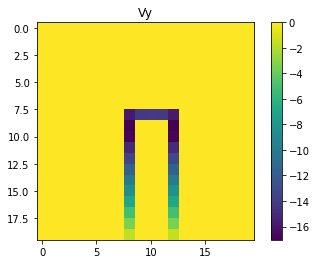

In [7]:
import numpy, math

col=20
row=20
H=0.01
V0 = 1
OMEGA = 0.02


start_width_beam = 8
end_width_beam =12
start_height_beam = 8
end_height_beam = row - 1


Ax=numpy.identity(col*row)
Ay = numpy.identity(col*row)
x = numpy.zeros(col*row)
y = numpy.zeros(col*row)
Bx = numpy.full(col*row, 0.1)
By = numpy.full(col*row, 0)
#matriz inicial
initial_matrixX = numpy.zeros((row,col))


initial_matrixY = numpy.zeros((row,col))


def initialValuesVx():
    counter = 1
    for j in range(row):
        if j <= (row - j - 1):
            initial_matrixX[j] = counter
            initial_matrixX[row - j - 1] = counter
            counter += 1



def showMatrixM(matrix):
    matrix_to_show = numpy.array(matrix)
    for line in matrix_to_show:
        print(' '.join(map(str, line)))

def transformVToB(j,i):
    return j*col + i


#Ax = B

def transformBtoV(index):
    return [math.floor(index/col), index % col]

def setAx():
    start_col = col+1
    start_row = col+1
    
    #Boundary condition - first row of velocity field.
    for j in range(0,row):
        for i in range(0,col):
            indexAx = transformVToB(j,i) 
            # if(j==i and j==0):#esquina superior izquierda
            #     #print(j,i,"Esquina Superior Izquierda")
            #     Ax[indexAx][indexAx+1] = (-1/4)+(H/8)*initial_matrixY[j][i]
            #     Ax[indexAx][indexAx+col] = (-1/4)+(H/8)*initial_matrixX[j][i]
            # elif(j==0 and i==col-1): #esquina superior derecha
            #     #print(j,i,"Esquina Superior Derecha") 
            #     Ax[indexAx][indexAx -1] = (-1/4)-(H/8)*initial_matrixY[j][i]
            #     Ax[indexAx][indexAx + col]  = (-1/4)+(H/8)*initial_matrixX[j][i]
            # elif(j==row-1 and i==0): #esquina inferior izquierda
            #     #print(j,i,"Esquina Inferior Izquierda")
            #     Ax[indexAx][indexAx - col] = (-1/4)-(H/8)*initial_matrixX[j][i]
            #     Ax[indexAx][indexAx + 1] = (-1/4)+(H/8)*initial_matrixY[j][i]
            # elif(j==row-1 and i==col-1): #esquina inferior derecha
            #     #print(j,i,"Esquina Inferior Derecha")
            #     Ax[indexAx][indexAx-col] = (-1/4)-(H/8)*initial_matrixX[j][i]
            #     Ax[indexAx][indexAx-1] = (-1/4)-(H/8)*initial_matrixY[j][i]
            
            if(j==0 and i != (col - 1)): # first row
                # #print(j,i)
                Ax[indexAx, transformVToB(j+1, i)] = -1
                Ax[indexAx, indexAx] = 1
                Bx[indexAx] = V0*H
                # A[indexA, indexA - 1] = -(1/4)-(H/8)*initial_matrixY[j, i]
                # A[indexA, indexA + 1] = -(1/4)+(H/8)*initial_matrixY[j,i]
                # A[indexA, indexA + col] = -(1/4)+(H/8)*initial_matrixX[j,i]

            elif(j==row-1  and i != (col-1)): #last row
                # A[indexA, indexA] = 1
                    Ax[indexAx, indexAx - 1] = -(1/4)-(H/8)*initial_matrixY[j, i]
                    Ax[indexAx, indexAx + 1] = -(1/4)+(H/8)*initial_matrixY[j,i]
                    Ax[indexAx, indexAx - col] = -(1/4)-(H/8)*initial_matrixX[j,i] 

            elif(i == col - 1): #last column
                Ax[indexAx, transformVToB(j,i-1)] = -1
                Ax[indexAx, indexAx] = 1
                Bx[indexAx] = 0
                # A[indexAx, indexAx + 1] = -(1/4)-(H/8)*initial_matrixY[j, i]
                # A[indexAx, indexAx + col] = -(1/4)+(H/8)*initial_matrixX[j,i]
                # A[indexAx, indexAx - col] = -(1/4)-(H/8)*initial_matrixX[j,i]

            elif(i == 0 and j != 0): #first column
                Ax[indexAx, transformVToB(j,i+1)] = -1
                Ax[indexAx, indexAx] = 1
                Bx[indexAx] = 0
                # Ax[indexAx, indexAx + 1] = -(1/4)+(H/8)*initial_matrixY[j, i]
                # Ax[indexAx, indexAx + col] = -(1/4)+(H/8)*initial_matrixX[j,i]
                # Ax[indexAx, indexAx - col] = -(1/4)-(H/8)*initial_matrixX[j,i] 

    for j in range(1, row - 1):
        for i in range(1, col - 1):

            Ax[start_row][start_col + 1] = (-1/4)+(H/8)*initial_matrixY[j][i]
            Ax[start_row][start_col + col] = (-1/4)+(H/8)*initial_matrixX[j][i]
            Ax[start_row][start_col - 1] = (-1/4)-(H/8)*initial_matrixY[j][i]
            Ax[start_row][start_col - col] = (-1/4)-(H/8)*initial_matrixX[j][i]

            start_row += 1
            start_col += 1
        start_row += 2
        start_col += 2

        

    

def setAy():
    for j in range(row):
        for i in range(col):
            indexY = transformVToB(j,i)
            if i == start_width_beam and j >= start_height_beam and j <= end_height_beam:
                Ay[indexY, indexY] = 1
                By[indexY] = (-2/H*H)*initial_matrixX[j, i-1] + (2/H*H)*initial_matrixX[j,i]
            elif i == end_width_beam and j >= start_height_beam and j <= end_height_beam:
                Ay[indexY, indexY] = 1
                By[indexY] = (-2/H*H)*initial_matrixX[j, i+1] + (2/H*H)*initial_matrixX[j,i]
            elif j == start_height_beam and i >= start_width_beam and i <= end_width_beam:
                Ay[indexY, indexY] = 1
                By[indexY] = (-2/H*H)*initial_matrixX[j-1, i] + (2/H*H)*initial_matrixX[j,i]


            




def beamV():
    for j in range(row):
        for i in range(col):
            if (i >= start_width_beam and i <= end_width_beam) and (j >= start_height_beam and j <= end_height_beam):
                #Vx field
                initial_matrixX[j][i] = 0
                #A equation system.
                indexAx = transformVToB(j,i)
                Ax[indexAx] = 0
                Ax[indexAx][indexAx] = 1
                Bx[indexAx] = 0 

def showVx():
    for j in range(row):
        for i in range(col):
            plt.quiver(i, j, solution[(row-1)-j][i],0, color='b', scale=2)
            plt.title("Vx")
    plt.show()


def iterations():
    #Iterations
    for _ in range(40):
    #     # Seidel execution
        for i in range(5):
            global x
            global y
            x = seidel(Ax,x,Bx)
            y = seidel(Ay, y, By)
            #Solution transformed to matrix.    
            solution_x = numpy.reshape(x, (row, col))
            solution_y = numpy.reshape(y, (row,col))
                
            #Residual correction
        for j in range(row):
            for i in range(col):
                initial_matrixX[j][i] = initial_matrixX[j][i] + OMEGA*(solution_x[j][i])
                initial_matrixY[j][i] = initial_matrixY[j][i] + OMEGA*(solution_y[j][i])

        setAx()
        setAy()
        beamV()
        # print("solution_y")
        # showMatrixM(solution_y)
        # print("-------------")
        # print("Vy")
        # showMatrixM(initial_matrixY)
    return [solution_x, solution_y]
    # showMatrixM(solution_x)
    # colorBar(solution_x, "lol")


    

def main():
    initialValuesVx()
    setAx()
    setAy()
    beamV()
    # showMatrixM(Ay)
    # print("---------------------")
    r = iterations()
    # showMatrixM(Ay)
    # print("--------------------------------")
    # print(By)
    # print("----")
    showMatrixM(initial_matrixY)
    colorBar(initial_matrixY,"Vy")
    

main()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f89b38c5-96be-4dcf-9b5d-e1b96d9b5992' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>